<p style="border: 1px solid #e7692c; border-left: 15px solid #e7692c; padding: 10px; text-align:justify;">
    <strong style="color: #e7692c">Tip.</strong> <a style="color: #000000;" href="https://nbviewer.jupyter.org/github/PacktPublishing/Hands-On-Computer-Vision-with-TensorFlow-2/blob/master/Chapter05/ch5_nb1_yolo_inference.ipynb" title="View with Jupyter Online">Click here to view this notebook on <code>nbviewer.jupyter.org</code></a>. 
    <br/>These notebooks are better read there, as Github default viewer ignores some of the formatting and interactive content.
    </p>

## Imports

In [22]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
# from yolov3_tf2.models import YoloV3
# from yolov3_tf2.utils import draw_outputs
# from yolov3_tf2.dataset import transform_images
from yolov3_tf2.models_for_tutorial import YoloV3
from yolov3_tf2.utils_for_tutorial import draw_outputs, transform_images
import matplotlib.pyplot as plt

CLASSES_PATH = 'data/coco.names'
WEIGHTS_PATH = 'data/weights/yolov3.tf'
IMAGE_SIZE = 416

## Load the model, the classes and the example image

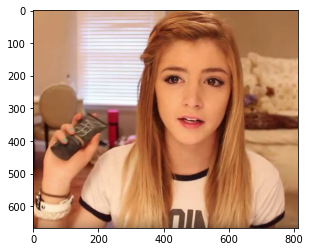

In [18]:
yolo = YoloV3()
yolo.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('data/girl.png', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

## Run inference and display result

In [20]:
output = yolo(input_img)
print(output, type(output), len(output),sep='\n\n')

(<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[0.06754473, 0.03718692, 0.967988  , 0.9650753 ],
        [0.01851872, 0.34200275, 0.17385136, 0.62783295],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.       

In [7]:
# 1. 박스 좌표 - 1차원: 전체 리스트 2차원: 박스 좌표들 3차원: 각 객체 위치 위치((x1,y1),(x2,y2))
# 2. 각 객체의 점수 - 1차원: 전체 리스트 2차원: 분류된 클래스에 속할 확률
# 3. 속한 클래스 - 1차원: 전체 리스트 2치원: 각 객체의 분류 클래스
# 4. 탐지된 객체 수
boxes, scores, classes, nums = yolo(input_img)

In [13]:
print(boxes,type(boxes),boxes.shape) # tf.Tensor, (1,100,4)
print(scores,type(scores),scores.shape) # tf.Tensor, (1,100)
print(classes,type(classes),classes.shape) # tf.Tensor, (1,100)
print(nums,type(nums),nums.shape) # tf.Tensor, (1,)

tf.Tensor(
[[[0.06754473 0.03718692 0.967988   0.9650753 ]
  [0.01851872 0.34200275 0.17385136 0.62783295]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.  

	person, 0.9997697472572327, [0.06754473 0.03718692 0.967988   0.9650753 ]
	chair, 0.926733136177063, [0.01851872 0.34200275 0.17385136 0.62783295]


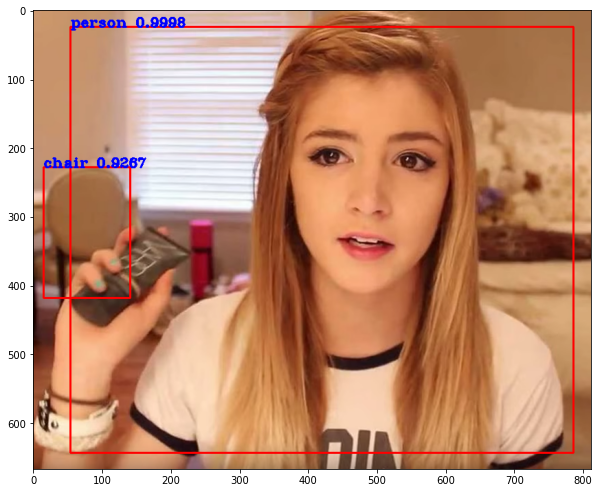

In [6]:
logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)